In [1]:
import pandas as pd 
import numpy as np

In [3]:
# Download the data
# ! wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [4]:
# read the data and store it in DataFrame using pandas 
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: ylabel='Frequency'>

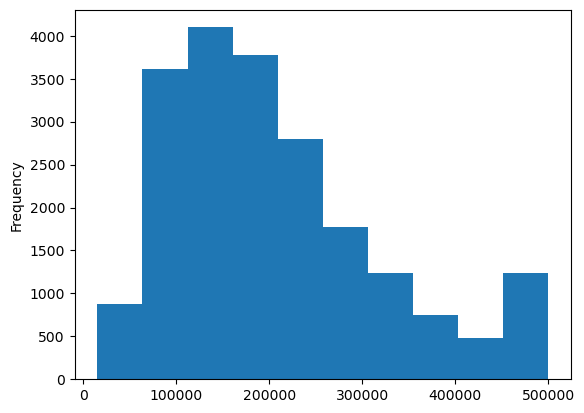

In [5]:
# Look at the median_house_value variable. Does it have a long tail?
df.median_house_value.plot(kind="hist")

## Preparing the dataset
- 1- keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
- 2- Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

In [6]:
filtered_df = df.loc[df.ocean_proximity.isin(['<1H OCEAN', 'INLAND']),['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
filtered_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


# Q1: There's one feature with missing values. What is it?

In [7]:
filtered_df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Q2: What's the median (50% percentile) for variable 'population'?

In [8]:
display(filtered_df.population.describe())

print(filtered_df.population.describe()["50%"])

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

1195.0


## Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [9]:
# Shuffle the dataframe 

shuffled_df = filtered_df.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [10]:
#Split your data in train/val/test sets, with 60%/20%/20% distribution.
n = len(shuffled_df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n, n_train, n_val, n_test)

15687 9413 3137 3137


In [11]:
df_train = shuffled_df.iloc[:n_train]
df_val = shuffled_df.iloc[n_train:n_train+n_val]
df_test = shuffled_df.iloc[n_train+n_val:]

print(df_train.shape, df_val.shape, df_test.shape)

(9413, 9) (3137, 9) (3137, 9)


In [ ]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [ ]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [ ]:
print(df_train.shape, df_val.shape, df_test.shape)

In [31]:
def data_splitter(df, seed =42):
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    # print(n, n_train, n_val, n_test)

    idx = np.arange(n)

    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)


    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    # print(df_train.shape, df_val.shape, df_test.shape)
    return df_train, df_val, df_test,y_train, y_val, y_test

# Q3

We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:

With 0
With mean
Both are equally good

In [14]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [15]:
# Fill na with 0 
X_train = df_train.fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

display(w0)
display(w)

-9.763249477549328

array([-2.68233309e-01, -2.55938802e-01,  1.77710730e-03, -3.38393956e-05,
        2.93766352e-04, -1.52190447e-04,  3.96908643e-04,  1.80600946e-01])

In [16]:
X_val = df_val.fillna(0).values
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.34

In [17]:
# Fill na with mean
X_train = df_train.fillna(df_train.mean()).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

display(w0)
display(w)

-9.8861332155921

array([-2.68652914e-01, -2.57026361e-01,  1.79880767e-03, -3.87631029e-05,
        3.78806885e-04, -1.49641599e-04,  3.25344392e-04,  1.81951358e-01])

In [18]:
X_val = df_val.fillna(df_val.mean()).values
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.34

# Q4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [19]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [20]:
# Fill na with 0 
X_train = df_train.fillna(0).values

w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = df_val.fillna(0).values

y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3408779300492999

In [21]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]: 
    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, round(score,2))

0 -9.763249477549328 0.34
1e-06 -9.763228830691759 0.34
0.0001 -9.761185235424271 0.34
0.001 -9.742646249645812 0.34
0.01 -9.561056192433915 0.34
0.1 -8.058889769406882 0.34
1 -3.133154278513541 0.34
5 -0.8410867975396633 0.35
10 -0.438117231642521 0.35


# Q5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))


In [32]:
seed_results = [] 
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test ,y_train, y_val, y_test = data_splitter(filtered_df, seed)
    
    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression(X_train, y_train)

    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    seed_results.append(score)

In [33]:
round(np.std(seed_results),3)

0.005

# Q6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?


In [34]:
df_train, df_val, df_test ,y_train, y_val, y_test = data_splitter(filtered_df, 9)

In [36]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

y_full_train = np.concatenate([y_train, y_val])

In [38]:
X_full_train = df_full_train.fillna(0).values

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = df_test.fillna(0).values
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.3349899336610853